In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')
=df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.cluster import KMeans
treino = df.drop('fraud',axis=1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(treino)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Antes de tudo, realizei a remoção da única label presente na base de dados, para que o modelo do KMeans possa fazer um agrupamento sem ela. Após isso, foi realizado o fit da base de dados sem a label (que seria se a compra é fraudada ou não). Por fim, o modelo criou os clusters.

In [ ]:
kmeans.score(treino)*-1**0.5

2921052776.994856

Como o score desse modelo não é uma medida de acurácia, não precisamos tomar nenhuma pré-conclusão olhando para esse número. O seu valor grande pode se dar ao fato da boa diferença entre algumas features, como as que marcam distância por exemplo.

In [ ]:
treino['clusters'] = kmeans.labels_
sns.set(style="ticks")
dfGraficos = treino.sort_values(by=['clusters'], ascending=True)

- Esse trecho de código foi necessário pois a base de dados tem uma quantidade enorme de linhas, sendo que as labels negativas são muito mais numerosas e  estavam sobrepondo as positivas, dificultando a análise. Essa programação faz com que na hora de exibir o gráfico, ele sobreponha as positivas em vez das negativas, tornando a análise mais produtiva.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


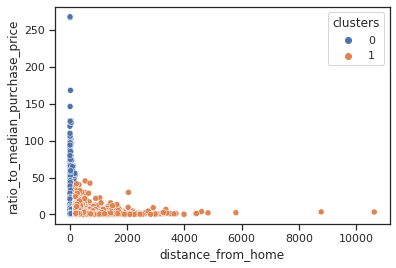

In [ ]:
sns.scatterplot(dfGraficos['distance_from_home'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

Realizando o primeiro agrupamento por clusters similares, é possível notar que:
- A grande maioria dos dados referentes à distância se concentra entre 0 e 6000km, enquanto em relação à taxa, vemos que a maioria se concentra entre 0 e 50.
- No caso desse modelo, a taxa do valor de compra em relação a media do valor de outras compras não parece ser um fator decisivo para determinar se aquela compra é uma fraude ou não.
- Por outro lado, é perceptível que quanto maior a distância da compra em relação à casa do cliente, mais o modelo apontou que aquela compra tem chance de ser fraude, o que pode ser um fator decisivo na hora do agrupamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


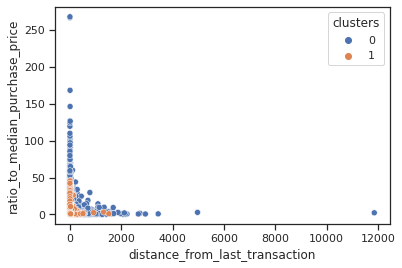

In [ ]:
sns.scatterplot(dfGraficos['distance_from_last_transaction'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

A distância em relação à última compra não se mostrou um fator tão decisivo na hora de identificar fraudadores nesse caso. Além disso, o modelo também apontou que taxas de variação entre 0 e 50 estão mais propensas a serem fraudes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


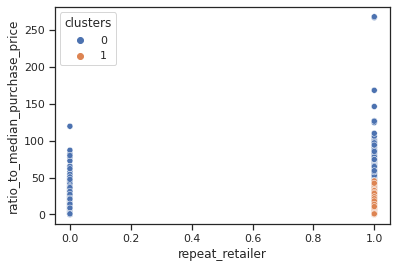

In [ ]:
sns.scatterplot(dfGraficos['repeat_retailer'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

Nesse caso, o modelo apontou que comprar com o mesmo varejista possuem uma chance muito maior de serem consideradas fraude no escopo do modelo. Por outro lado, a taxa não foi um fator considerado decisivo para essa decisão, mantendo os agrupamentos vistos anteriormente.
Além disso, é possível perceber que quando a compra é feita com o mesmo varejista, a taxa de variação tende a ser maior em relação à compras feitas com um varejista diferente.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


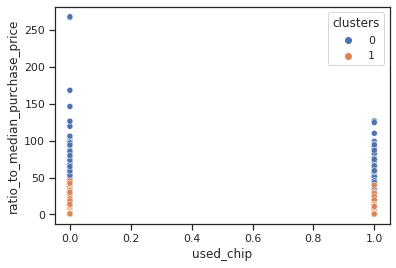

In [ ]:
sns.scatterplot(dfGraficos['used_chip'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

Aqui é possível ver que compras que não usaram o chip possuem uma tendência a ter uma taxa de variação maior em relação a compras que usaram chip. Isso pode indicar algo, mas nesse caso o modelo não apontou que o uso ou não do chip do cartão foi um fator decisivo para determinar se a compra é fraude ou não.
Além disso, é possível observar que a maioria das compras presentes na base de dados foram realizadas sem o uso do chip.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


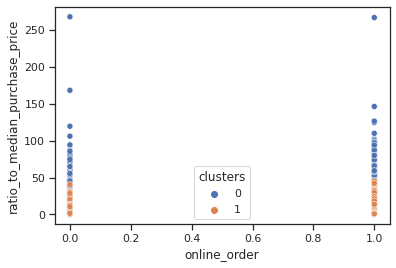

In [ ]:
sns.scatterplot(dfGraficos['online_order'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

O gráfico mostra que o fato de uma compra ser ou não online parece ser um fator um pouco mais decisivo na hora de detectar compras fraudulentas. Isso pode ser percebido pela densidade do número de círculos laranjas presentes quando o pedido é online (maior que quando o pedido não é online). A taxa de variação não se mostrou um fator decisivo até então.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


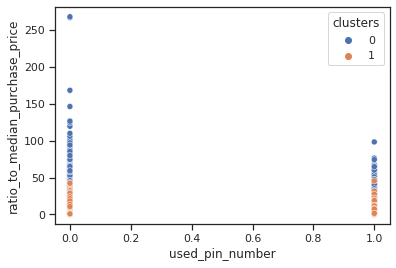

In [ ]:
sns.scatterplot(dfGraficos['used_pin_number'],dfGraficos["ratio_to_median_purchase_price"],hue=dfGraficos['clusters'])

O fato da compra ter ou não ter usado o número PIN do cartão pode ser considerado decisivo, pois a proporção de casos considerados fraude em relação a compras legítimas é muito maior quando a compra usa a senha do cartão do que quando não usa. Isso é um fenômeno curioso, dado que essa afirmação pode soar controversa. Contudo, isso também pode se dever ao fato de que a maioria das compras presentes na base de dados não usaram a senha. Sendo assim, apesar dessa proporção chamar a atenção, não há como afirmar se o uso ou não do número PIN representa um fator decisivo.

In [ ]:
df['fraude'] = kmeans.labels_
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Aqui vemos que o número de casos negativos é muito maior que a de positivos, mantendo uma certa coerência com a base de dados original, como visto nas etapas anteriores.

In [ ]:
teste = df
teste_result=KMeans(n_clusters=2)
teste_result.fit(teste)
teste_result.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Agora realizando o teste do modelo, incluindo a feature removida anteriormente para o treino.

In [ ]:
teste_result.score(teste)*-1**0.5

2921130340.2984924

Novamente, a acurácia do treino não serve como métrica neste caso. Contudo, é importante observar que ela é um número bem semelhante ao da de treino (um pouco maior). Isso indica que o modelo de teste fez agrupamentos muito semelhantes, com um pouco menos de precisão.

In [ ]:
sns.set(style="ticks")
teste['clusters'] = kmeans.labels_
testeGraficos = teste.sort_values(by=['clusters'], ascending=True)

Realizando mais uma vez a priorização de positivos para não ocorrer uma sobreposição deles no gráfico.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


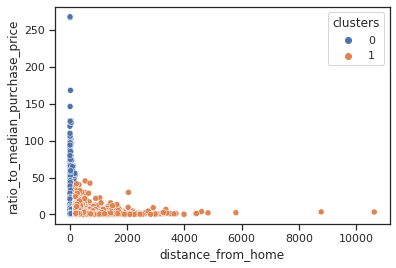

In [ ]:
sns.scatterplot(testeGraficos['distance_from_home'],testeGraficos["ratio_to_median_purchase_price"],hue=testeGraficos['clusters'])

Como pode ser observado, os agrupamentos não mudaram muito. A distância de casa continua sendo um fator decisivo na hora do agrupamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


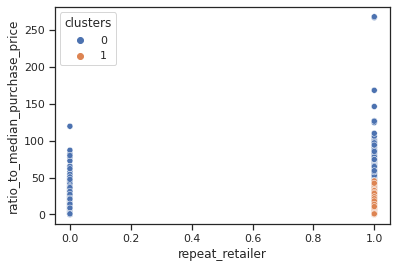

In [ ]:
sns.scatterplot(testeGraficos['repeat_retailer'],testeGraficos["ratio_to_median_purchase_price"],hue=testeGraficos['clusters'])

Mesma coisa aqui. Compras com o mesmo varejista se mostraram um fator bastante decisivo para determinar que uma transação é fraudulenta.